In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

%matplotlib inline

In [2]:
#Importing all csv files (4 stocks, ETF, and 10yr T-Bill)

In [3]:
shel_df = pd.read_csv(Path('data/SHEL_5yr_time_series.csv'), 
                index_col = 'Date',
                parse_dates = True,
                infer_datetime_format = True,                      
                     )
shel_df = shel_df["Adj Close"]

In [4]:
xom_df = pd.read_csv(Path('data/XOM_5yr_time_series.csv'),
                index_col = 'Date',
                    parse_dates = True,
                      infer_datetime_format = True,
                      
                     )
xom_df = xom_df["Adj Close"]

In [5]:
cvx_df = pd.read_csv(Path('data/CVX_5yr_time_series.csv'),
                index_col = 'Date',
                    parse_dates = True,
                      infer_datetime_format = True,
                      
                     )
cvx_df = cvx_df["Adj Close"]

In [6]:
cop_df = pd.read_csv(Path('data/COP_5yr_time_series.csv'),
                index_col = 'Date',
                    parse_dates = True,
                      infer_datetime_format = True,
                      
                     )
cop_df = cop_df["Adj Close"]

In [7]:
ixc_df = pd.read_csv(Path('data/IXC_5yr_time_series.csv'),
                index_col = 'Date',
                    parse_dates = True,
                      infer_datetime_format = True,
                      
                     )
ixc_df = ixc_df["Adj Close"]

In [8]:
treasury_df = pd.read_csv(Path('data/10_yr_treasury_5yr_time_series.csv'),
                index_col = 'Date',
                    parse_dates = True,
                      infer_datetime_format = True,
                      
                     )
treasury_df = treasury_df["Adj Close"]

In [9]:
#Combining the 4 stocks and ETF into a DataFrame (energy_stocks_df)

In [10]:
energy_stocks_df = pd.concat([shel_df, cop_df,cvx_df,xom_df,ixc_df],
                            axis=1)
energy_stocks_df=energy_stocks_df.set_axis(['SHEL', 'COP', 'CVX','XOM', 'IXC'], axis=1)

In [11]:
display(energy_stocks_df.head())
display(energy_stocks_df.tail())

,SHEL,COP,CVX,XOM,IXC
Date,,,,,
2017-10-01,49.569248,43.725098,92.921890,64.010841,27.338148
2017-11-01,50.426472,43.726921,95.407494,63.964775,27.707043
2017-12-01,53.255947,47.173164,101.318382,64.828041,28.508978
2018-01-01,56.074009,50.542061,101.447868,67.664841,29.981033
2018-02-01,50.509724,46.674702,90.578758,58.704857,27.226599


,SHEL,COP,CVX,XOM,IXC
Date,,,,,
2022-05-01,58.160614,108.933136,171.674988,94.112198,39.707764
2022-06-01,51.797909,87.461830,143.476334,84.815910,33.274773
2022-07-01,52.877651,95.618851,162.305252,95.997269,36.250000
2022-08-01,52.481411,107.415405,156.636765,94.670158,36.900002
2022-09-01,49.759998,100.889244,143.669998,87.309998,33.330002


In [12]:
#Calculating Pct Change for each stock and ETF
energy_stocks_returns = energy_stocks_df.pct_change().dropna()
energy_stocks_returns.head()

,SHEL,COP,CVX,XOM,IXC
Date,,,,,
2017-11-01,0.017293,0.000042,0.026749,-0.000720,0.013494
2017-12-01,0.056111,0.078813,0.061954,0.013496,0.028943
2018-01-01,0.052915,0.071416,0.001278,0.043759,0.051635
2018-02-01,-0.099231,-0.076518,-0.107140,-0.132417,-0.091873
2018-03-01,0.023208,0.097571,0.029085,-0.004846,0.017061


In [13]:
#Generating Summary Statistics for the Returns 
energy_stocks_returns.describe()

,SHEL,COP,CVX,XOM,IXC
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,0.003372,0.022062,0.011348,0.009753,0.007550
std,0.083087,0.127172,0.090419,0.095385,0.091319
min,-0.193181,-0.359397,-0.214625,-0.251261,-0.303505
25%,-0.036032,-0.053558,-0.036378,-0.051917,-0.031599
50%,0.007776,0.021637,0.001278,0.013496,0.011879
75%,0.049016,0.087797,0.057910,0.068143,0.047991
max,0.324462,0.399247,0.269666,0.241379,0.289203


In [14]:
#Calculating and Annualizing Standard Deviation for Each Stock and ETF
months_in_year = 12
standard_deviation = energy_stocks_returns.std()
annualized_standard_deviation = standard_deviation * np.sqrt(months_in_year) 

print("Standard_Deviations")
standard_deviation.sort_values()

Standard_Deviations


SHEL    0.083087
CVX     0.090419
IXC     0.091319
XOM     0.095385
COP     0.127172
dtype: float64

In [15]:
print("Annualized_Standard_Deviations")
annualized_standard_deviation.sort_values()

Annualized_Standard_Deviations


SHEL    0.287822
CVX     0.313222
IXC     0.316337
XOM     0.330423
COP     0.440538
dtype: float64

In [16]:
#Calculating the Annualized Avg Returns
annualized_energy_stock_returns = energy_stocks_returns.mean() * months_in_year

annualized_energy_stock_returns.sort_values()

SHEL    0.040461
IXC     0.090604
XOM     0.117033
CVX     0.136172
COP     0.264747
dtype: float64

In [17]:
#Using the Pandas var function, calculate the variance of all stocks
energy_stocks_returns.var()

SHEL    0.006903
COP     0.016173
CVX     0.008176
XOM     0.009098
IXC     0.008339
dtype: float64

In [18]:
# Using the Pandas var function, generate the variance for just the S&P 500
# The S&P 500 is being used as the proxy for the market throughout this activity
variance_market = energy_stocks_returns['IXC'].var()

# View the variance of the market
variance_market


0.00833908121588774

In [19]:
# Using the Pandas cov function, calculate the covariance between the daily returns of XOM and the daily returns of the S&P 500
XOM_covariance = energy_stocks_returns['XOM'].cov(energy_stocks_returns['IXC'])

# View the XOM covariance
XOM_covariance


0.007872306777480829

In [20]:
# Using the Pandas cov function, calculate the covariance between the daily returns of CVX and the daily returns of the S&P 500
CVX_covariance = energy_stocks_returns['CVX'].cov(energy_stocks_returns['IXC'])

# View the CVX covariance
CVX_covariance

0.0074529096646743535

In [21]:
# Using the Pandas cov function, calculate the covariance between the daily returns of COP and the daily returns of the S&P 500
COP_covariance = energy_stocks_returns['COP'].cov(energy_stocks_returns['IXC'])

# View the COP covariance
COP_covariance

0.010722081923684552

In [22]:
# Using the Pandas cov function, calculate the covariance between the daily returns of XOM and the daily returns of the S&P 500
SHEL_covariance = energy_stocks_returns['SHEL'].cov(energy_stocks_returns['IXC'])

# View the SHELL covariance
SHEL_covariance

0.0064117058829335095

In [23]:
# Calculate beta of SHELL by dividing the covariance of SHELL by the variance of the IXC
SHEL_beta = SHEL_covariance / variance_market

# Print the beta of SHEL
print(f"SHEL: {SHEL_beta}")

SHEL: 0.7688743779971627


In [24]:
# Calculate beta of XOM by dividing the covariance of XOML by the variance of the IXC
XOM_beta = XOM_covariance / variance_market

# Print the beta of XOM
print(f"XOM: {XOM_beta}")

XOM: 0.9440256754523981


In [25]:
# Calculate beta of CVX by dividing the covariance of CVX by the variance of the IXC
CVX_beta = CVX_covariance / variance_market

# Print the beta of FB
print(f"CVX: {CVX_beta}")

CVX: 0.8937327112817849


In [26]:
# Calculate beta of COP by dividing the covariance of COP by the variance of the IXC
COP_beta = COP_covariance / variance_market

# Print the beta of FB
print(f"COP: {COP_beta}")

COP: 1.2857629810891738


In [33]:
# creat a dataframe for beta 
data = {'Company': ['SHEL','COP','CVX','XOM'],'Beta': [SHEL_beta,XOM_beta,CVX_beta,COP_beta,]}
Beta=pd.DataFrame(data, columns= ['Company','Beta'])
%store Beta
Beta 
                  

Stored 'Beta' (DataFrame)


,Company,Beta
0,SHEL,0.768874
1,COP,0.944026
2,CVX,0.893733
3,XOM,1.285763


In [31]:
Beta.sort_values

,Company,Beta
0,SHEL,0.768874
1,COP,0.944026
2,CVX,0.893733
3,XOM,1.285763


<AxesSubplot:title={'center':'Beta for each energy stock against the index ETF'}, xlabel='Stocks & ETF', ylabel='Beta'>

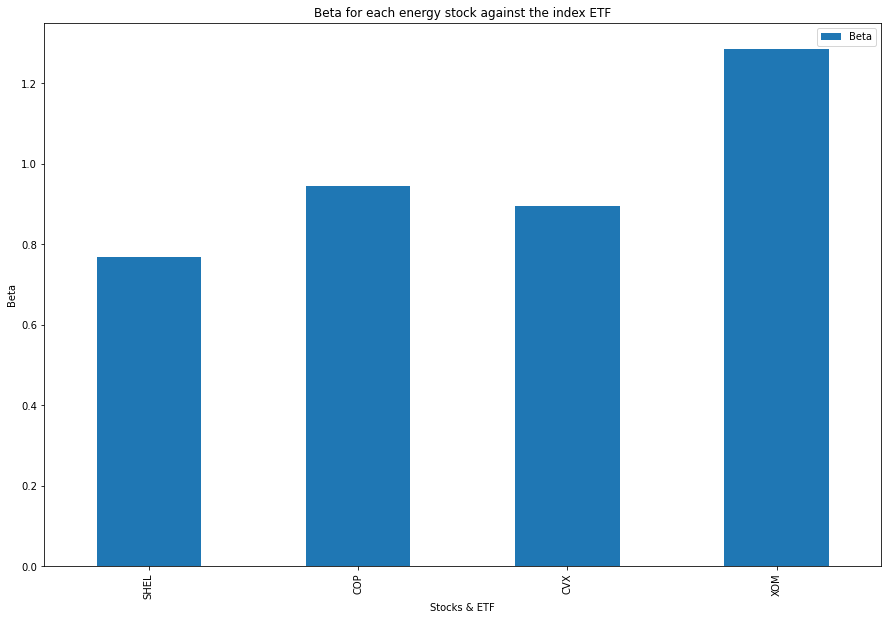

In [29]:
#creating plots 
Beta.plot.bar(figsize=(15,10),title="Beta for each energy stock against the index ETF", use_index='false', x="Company", xlabel= "Stocks & ETF", ylabel = "Beta")

In [30]:
print('hello')


hello
